# Linear Regression practice

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [20]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Two variables

In [21]:
X = df[['lstat', 'age']] #Predictors
X = sm.add_constant(X) #Adding a ones column to X to allow the model to estimate the intercept
y = df['medv'] #Output
model =sm.OLS(y,X) #Important to write (y, X) and NOT (X, y)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           2.98e-88
Time:                        21:42:00   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## More variables

In [22]:
variables = df.columns.drop('medv') #Creating an index of columns without 'medv' to create X conveniently
X = df[variables]
X = sm.add_constant(X)
y = df['medv']

model_2 = sm.OLS(y, X)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     105.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.26e-132
Time:                        21:42:00   Log-Likelihood:                -1504.2
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     492   BIC:                             3096.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6430      4.934      8.439      0.000      31.948      51.338
Unnamed: 0    -0.0024      0.002     -1.154      0.249      -0.007       0.002
crim          -0.1222      0.033     -3.703      0.000      -0.187      -0.057
zn             0.0485      0.014      3.480      0.001       0.021       0.076
indus          0.0128      0.062      0.207      0.836      -0.109       0.135
chas           2.8585      0.870      3.286      0.001       1.149       4.568
nox          -18.5465      3.854     -4.812      0.000     -26.120     -10.973
rm             3.6856      0.421      8.759      0.000       2.859       4.512
age            0.0011      0.014      0.081      0.935      -0.025       0.028
dis           -1.5079      0.202     -7.461      0.000      -1.905      -1.111
rad            0.3075      0.069      4.476      0.000       0.172       0.442
tax           -0.0120      0.004     -3.112      0.002      -0.020      -0.004
ptratio       -0.9329      0.132     -7.055      0.000      -1.193      -0.673
lstat         -0.5535      0.051    -10.926      0.000      -0.653      -0.454
==============================================================================
Omnibus:                      168.602   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.210
Skew:                           1.459   Prob(JB):                    3.61e-150
Kurtosis:                       7.912   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### For example, the variable 'age' has an high p-value. What if we'd like to remove it?

In [23]:
variables_2 = df.columns.drop(['medv', 'age'])
variables_2

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad',
       'tax', 'ptratio', 'lstat'],
      dtype='object')

# Goodness of fit

### Multiple collinearity asessment: VIF (variance inflation error)

In [24]:
vals = [VIF(X, i) #The function VIF() takes two arguments: a dataframe or array, and a variable column index
    for i in range(2, X.shape[1])] # We start from 2 to exclude the intercept which not interesting in this case
'''
Same thing as:
vals = []
for i in range(2, X.shape[1]):
    vals.append(VIF(X, i))
'''

vif = pd.DataFrame({'vif':vals},
index = X.columns[2:])
vif

,vif
crim,1.768234
zn,2.319982
indus,3.987493
chas,1.071531
nox,4.378998
rm,1.918686
age,3.170744
dis,3.975430
rad,7.852686
tax,9.235799


'rad' and 'tax' show high collinearity. They may be removed

### Interaction terms

In [25]:
df['lstat * age'] = df['lstat'] * df['age'] #Creating the interaction column
X = df[['lstat', 'age', 'lstat * age']]
X = sm.add_constant(X)
y = df['medv']

model_3 = sm.OLS(y, X)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           4.86e-88
Time:                        21:42:00   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.0885      1.470     24.553      0.000      33.201      38.976
lstat          -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age            -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat * age     0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value of the interaction term is significant (0.025). Therefore, it should be considered along with both 'lstat' and 'age'

### Non-linear Transformationsof the Predictors

Incorporating non-linear transformations like polynomial terms is crucial for improving model accuracy and capturing complex relationships

In [26]:
df['lstat_squared'] = np.power(df['lstat'], 2)
X = df[['lstat', 'lstat_squared', 'age']]
X = sm.add_constant(X)
y = df['medv']

model_3 = sm.OLS(y, X)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.03e-120
Time:                        21:42:00   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.2885      0.873     47.284      0.000      39.573      43.004
lstat            -2.6883      0.131    -20.502      0.000      -2.946      -2.431
lstat_squared     0.0495      0.004     13.315      0.000       0.042       0.057
age               0.0703      0.011      6.471      0.000       0.049       0.092
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'lstat_squared' p-values is 0. This model is improved.

In [27]:
 anova_lm(result, result_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


Here results1 represents the linear submodel containing predictors lstat and age, while results3 corresponds to the larger model above with a quadratic term in lstat. The anova_lm() function performs a hypothesis test comparing the two models. The null hypothesis is that the quadratic term in the bigger model is not needed, and the alternative hypothesis is that the bigger model is superior. Here the F-statistic is 177.28 and the associated p-value is zero.

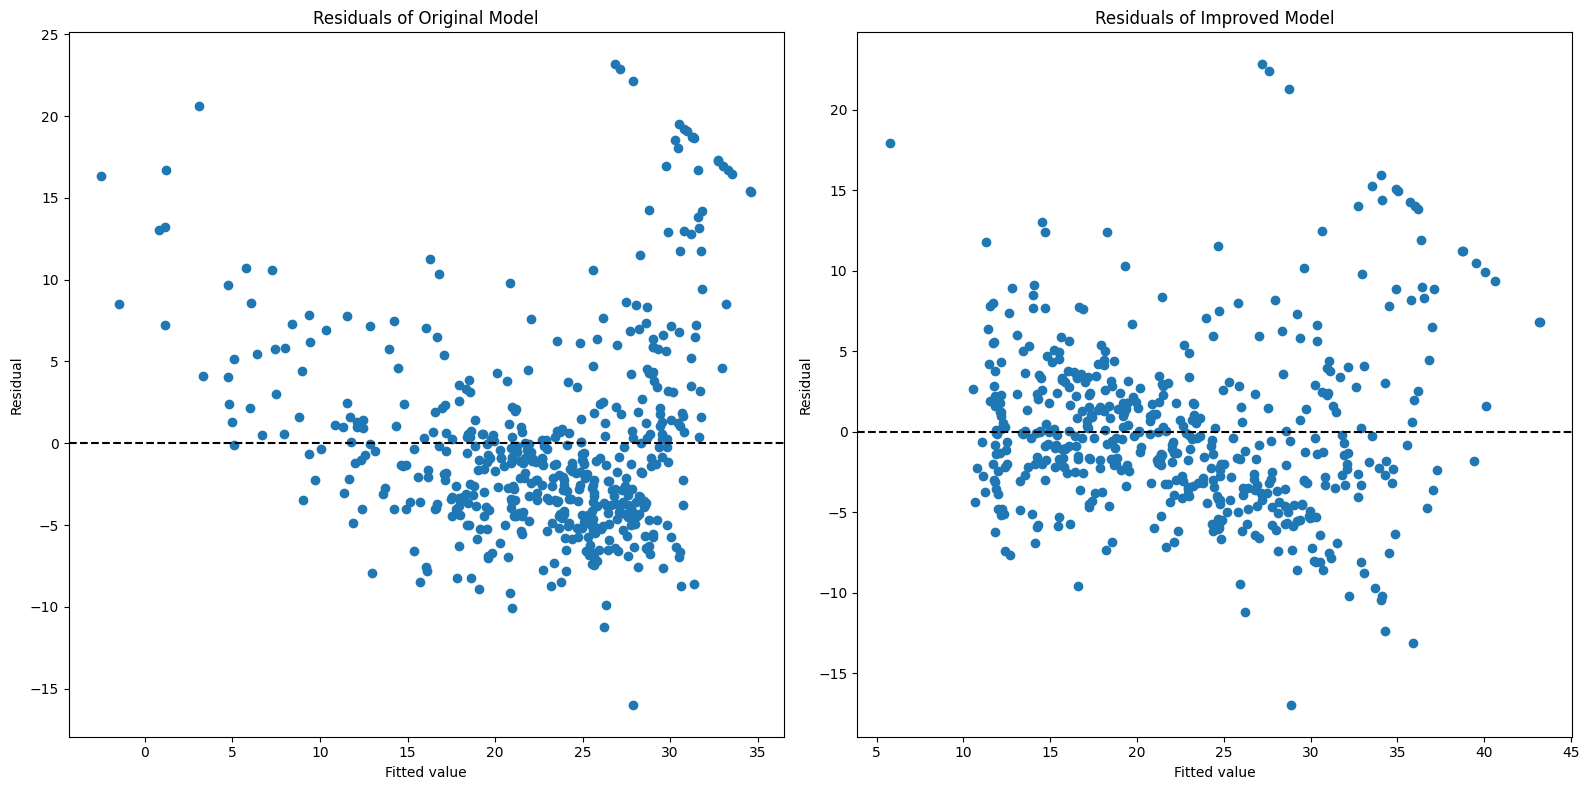

In [28]:
# Checking residual plots of the two models
from matplotlib.pyplot import subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))



# Second residual plot (Without quadratic term)
axs[0].scatter(result.fittedvalues, result.resid)
axs[0].set_xlabel('Fitted value')
axs[0].set_ylabel('Residual')
axs[0].axhline(0, color='k', linestyle='--')
axs[0].set_title('Residuals of Original Model')

# First residual plot (Improved one)
axs[1].scatter(result_3.fittedvalues, result_3.resid)
axs[1].set_xlabel('Fitted value')
axs[1].set_ylabel('Residual')
axs[1].axhline(0, color='k', linestyle='--')
axs[1].set_title('Residuals of Improved Model')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

We see that when the quadratic term is included in the model, there is little discernible pattern in the residuals. In order to create a cubic or higher-degree polynomial fit, we can simply change the exponent when adding a new raw.

# Exercise 1

In [29]:
auto =  pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [31]:
# Horsepower isn't supposed to be an object. Let's convert it to float
auto['horsepower'] = auto['horsepower'].replace("?", np.nan) #There were '?' instead on NaN values
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [32]:
# I'm replacing NaN values with the mean. More efficient methods could be use (MICE iteration), but they are beyond the scope of this exercise
auto['horsepower'] = auto['horsepower'].fillna(auto['horsepower'].mean())
auto['horsepower'].isnull().sum()

0

In [33]:
X = auto['horsepower']
X = sm.add_constant(X)
y = auto['mpg']

model_auto = sm.OLS(y, X)
result_auto = model_auto.fit()
result_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.45e-79
Time:                        21:42:02   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.000      38.573      41.438
horsepower    -0.1578      0.007    -24.096      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       21.884   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.108
Skew:                           0.557   Prob(JB):                     5.82e-06
Kurtosis:                       3.464   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of 'horsepower' is 0, so there is a significant relationship between the predictor and the response. It is negative due to the negative
coefficient (-0.1578)

### Predictions

In [34]:
# Making a prediction
predictor = pd.DataFrame({'horsepower': [98]})
predictor = sm.add_constant(predictor, has_constant = 'add')  # has_constant='add' is important because the dataset is constant (98)
prediction = result_auto.get_prediction(predictor)
print("Predicted value:\n", prediction.predicted_mean)
# Print the confidence interval
print("Confidence Interval:\n", prediction.conf_int(alpha = 0.05))

# Print the prediction interval
print("Prediction Interval:\n", prediction.conf_int(obs = True, alpha = 0.05))

Predicted value:
 [24.5370278]
Confidence Interval:
 [[24.03806693 25.03598868]]
Prediction Interval:
 [[14.72219317 34.35186243]]


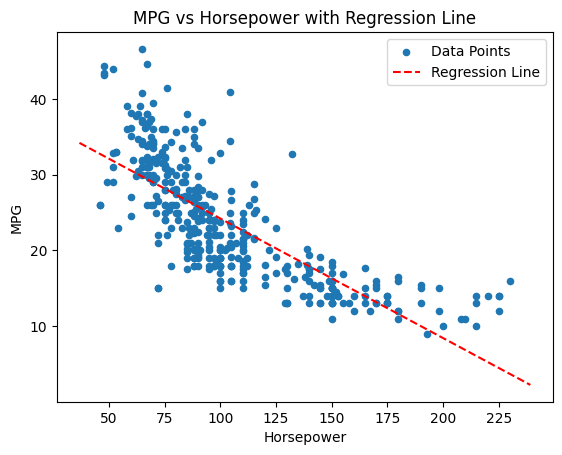

In [35]:
def abline(ax, b, m, *args, **kwargs):
    # Add a line with slope m and intercept b to ax. Last 2 arguments are for graphics
    xlim = ax.get_xlim() # Getting min and max of x
    ylim = [m * x + b for x in xlim]  # for every x, it calculates the corresponding y
    ax.plot(xlim, ylim, *args, **kwargs)

# Create scatter plot
ax = auto.plot.scatter(x='horsepower', y='mpg', label='Data Points')

# Access parameters to avoid warnings
intercept = result_auto.params['const']
slope = result_auto.params['horsepower']
# Add the regression line
abline(ax, intercept, slope, 'r--', label='Regression Line')


ax.set_title('MPG vs Horsepower with Regression Line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
plt.legend()
plt.show()


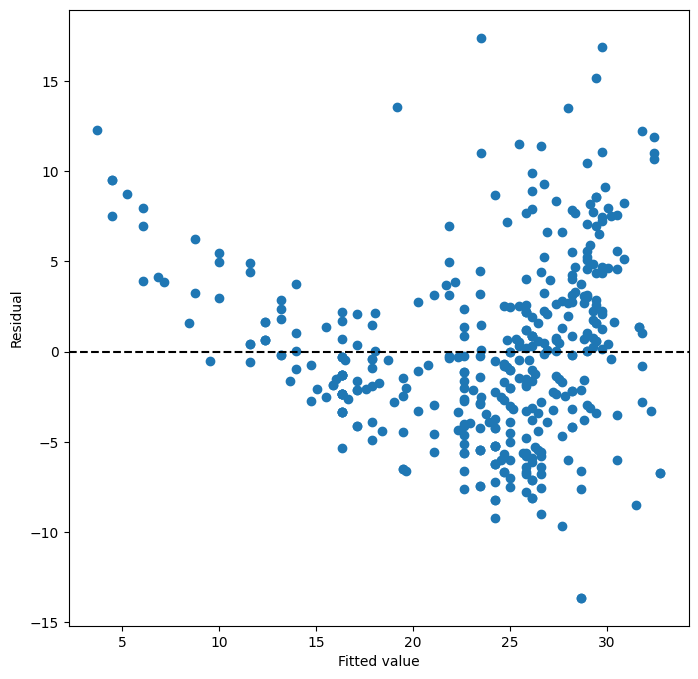

In [36]:
# Checking residual plot to assess linearity of the data
ax = subplots(figsize = (8,8))[1]
ax.scatter(result_auto.fittedvalues, result_auto.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c= 'k', ls = '--')

The chart present an "U" shape showing a non-linearity in the data.

Text(0, 0.5, 'Studentized Residuals')

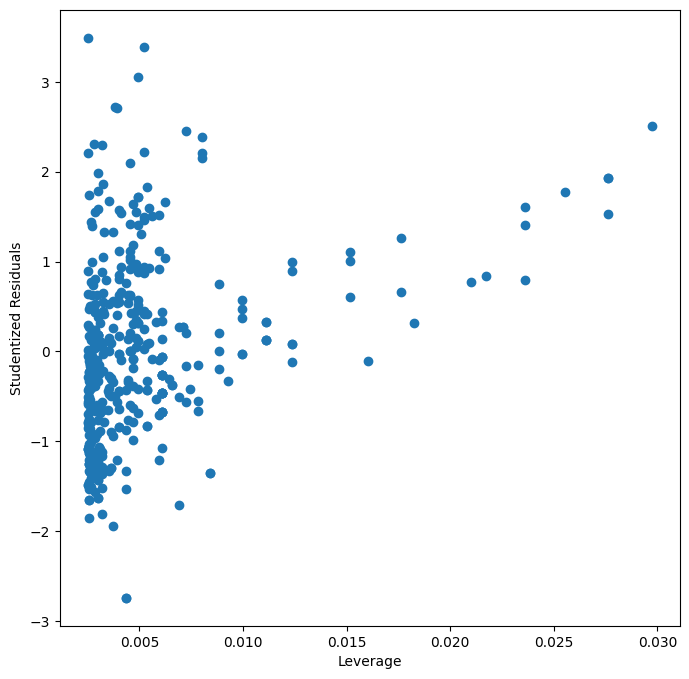

In [37]:
# Looking for high leverage points
stu_res = result_auto.get_influence().get_resid_studentized_external()
infl = result_auto.get_influence()

fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(infl.hat_matrix_diag, stu_res)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

There are no points with high studentized residual AND high leverage

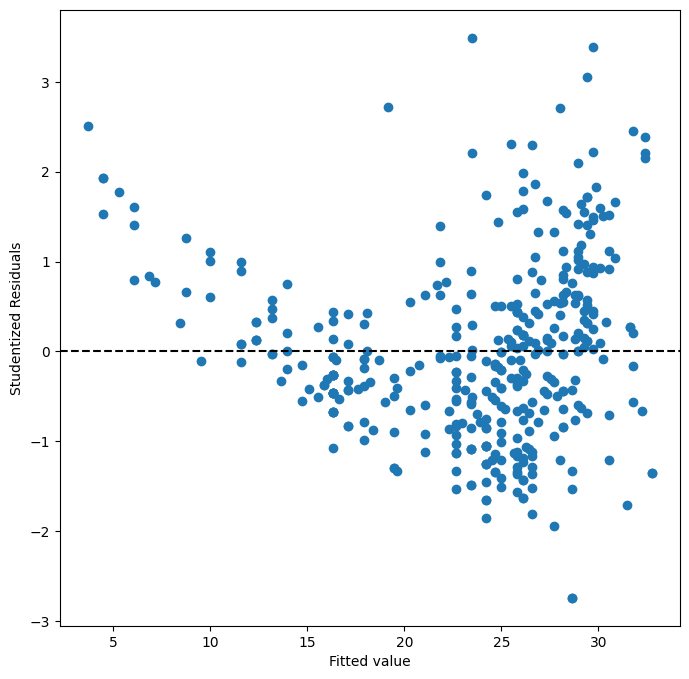

In [38]:
# Looking for outliers
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(x = result_auto.fittedvalues, y = stu_res)
plt.xlabel('Fitted value')
plt.ylabel('Studentized Residuals')
plt.axhline(0, c = 'k', ls = '--')
plt.show()

There are some points outside of [-3, 3], then they can be classifies as outliers

In [39]:
# Let's find those points
outliers=[]
for index in range(len(stu_res)):  # Iterate over the indices of stu_res
    if np.abs(stu_res[index]) > 3:
        outliers.append((index, stu_res[index]))
outliers

[(322, 3.3892149814420516),
 (329, 3.0501073030820707),
 (330, 3.4910850053651137)]

In [40]:
# Let's find the corresponding data values
for i in range(len(outliers)):
    print((auto['horsepower'].iloc[outliers[i][0]], auto['mpg'].iloc[outliers[i][0]]))

(65.0, 46.6)
(67.0, 44.6)
(104.46938775510205, 40.9)


These data values can be removed from the model

## Exercise with many variables

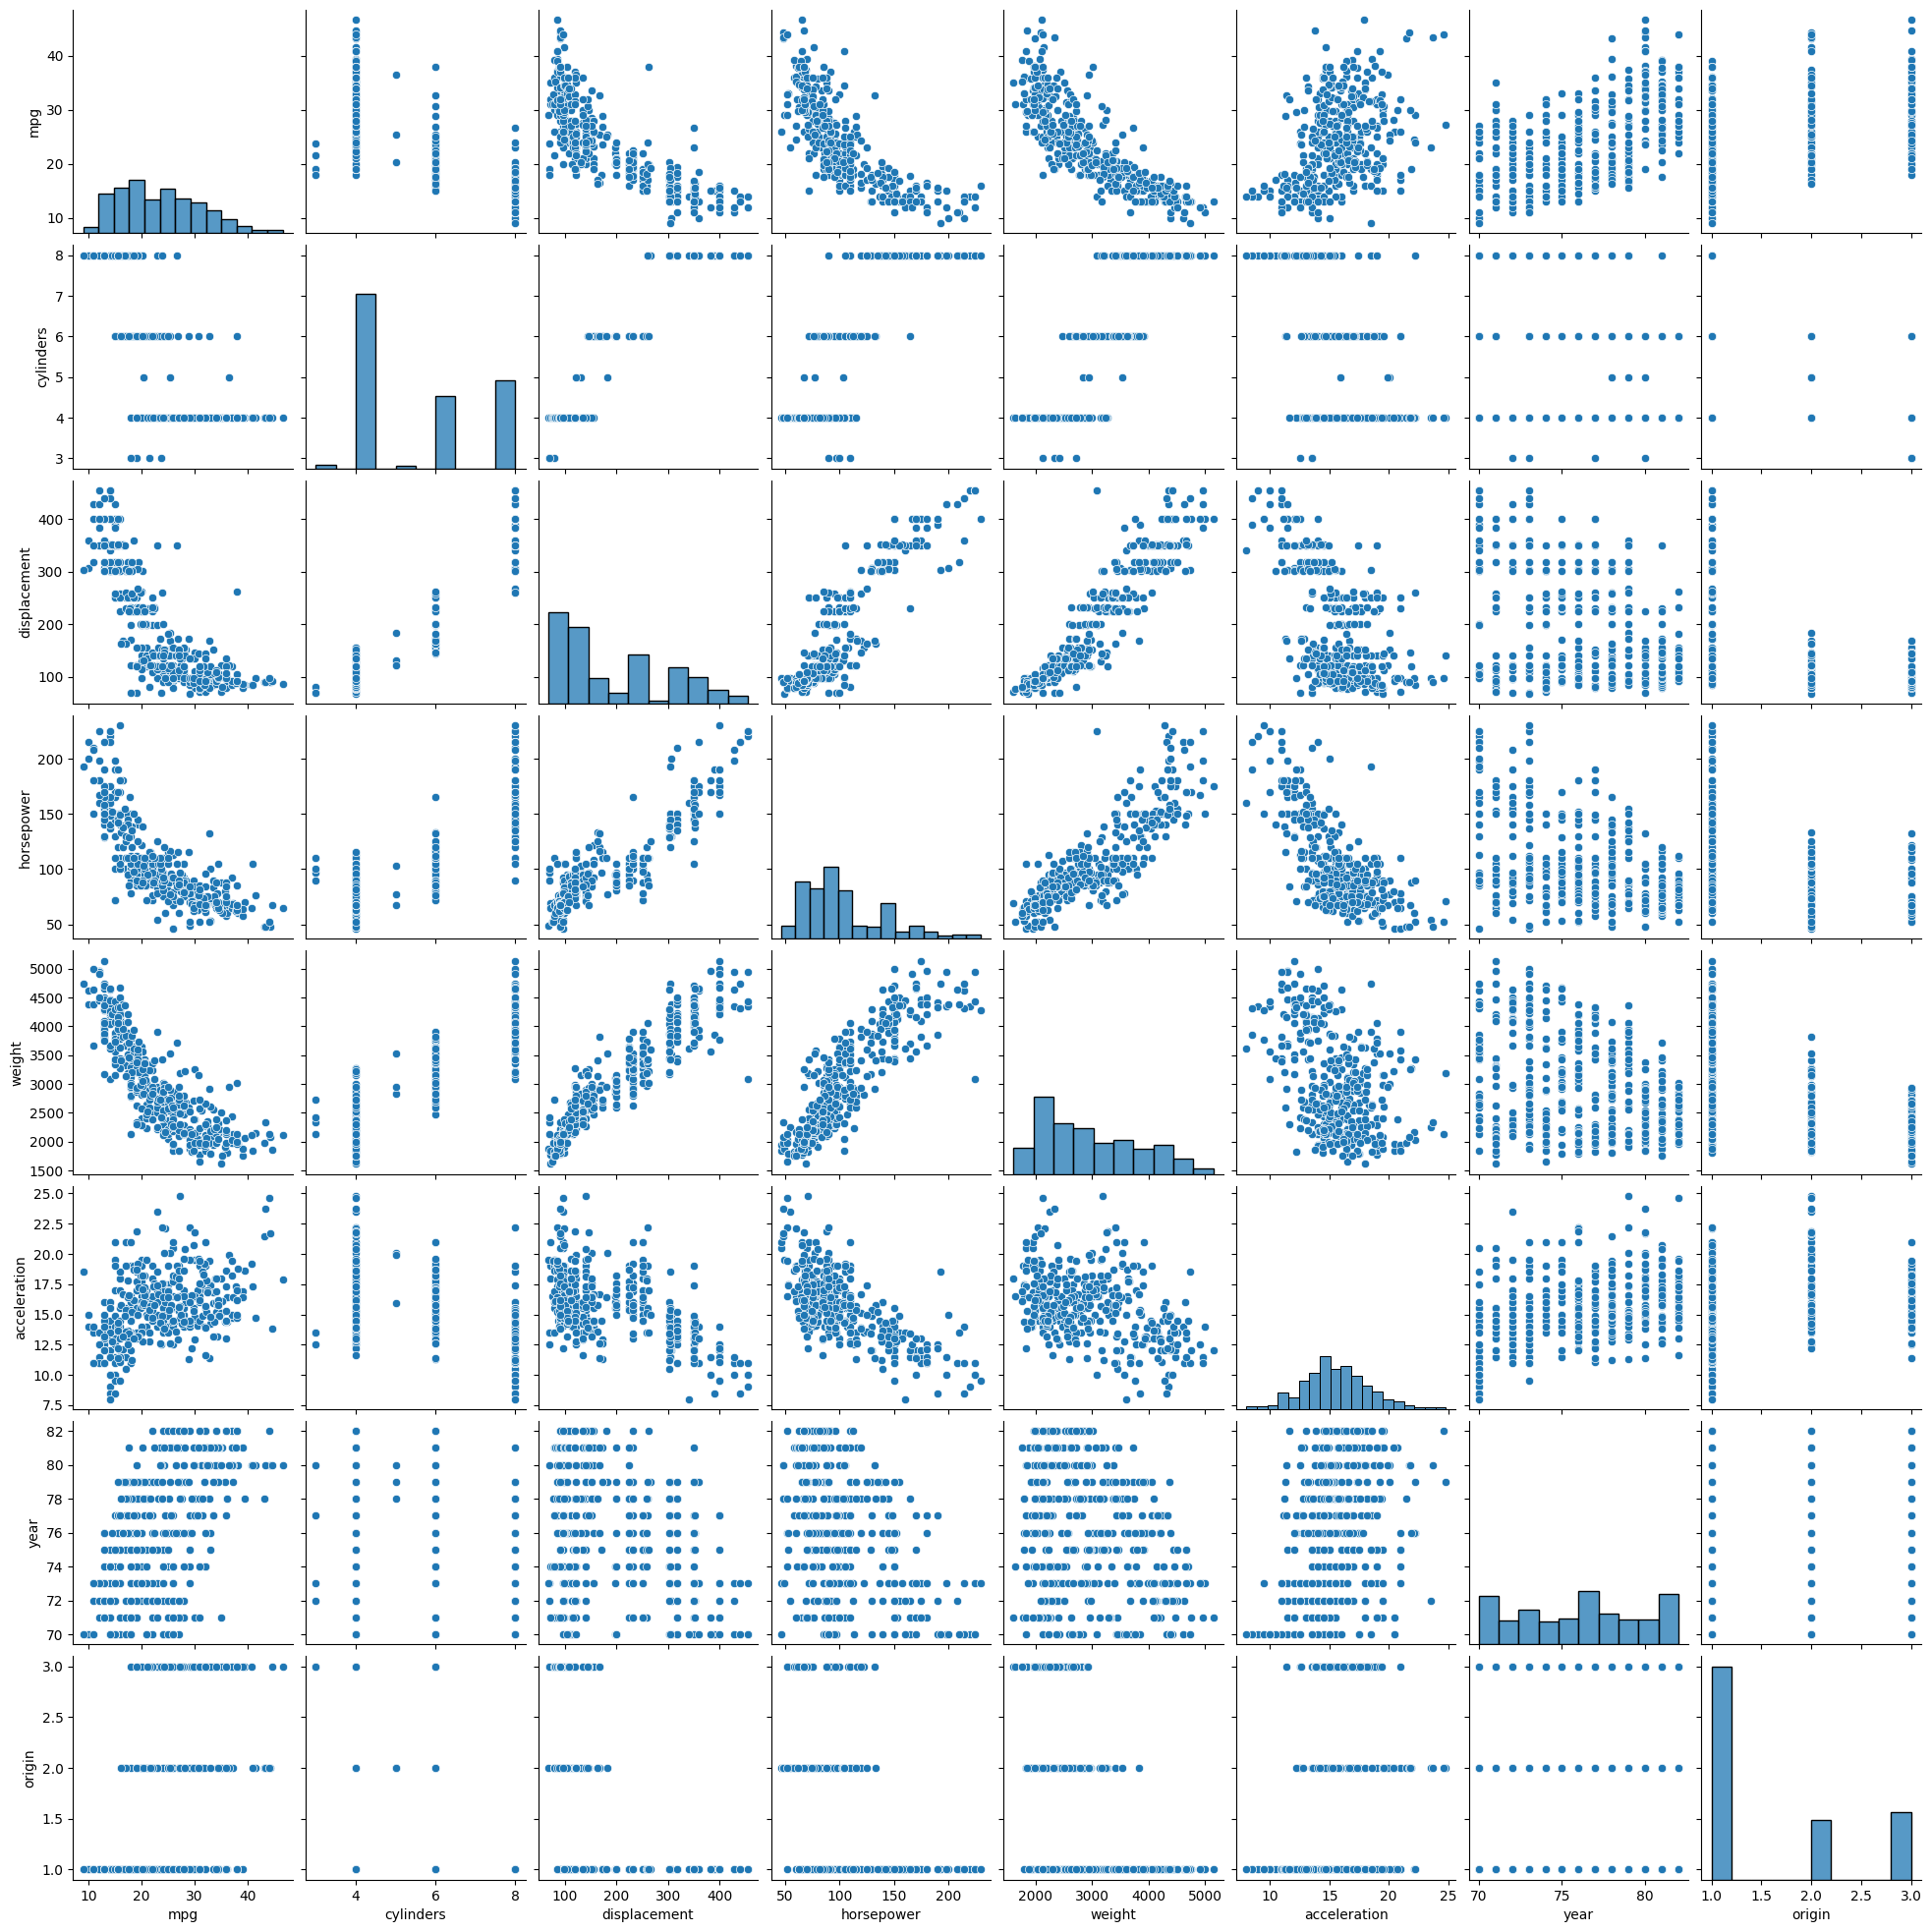

In [41]:
# Some initial info about the data
import seaborn as sns
sns.pairplot(auto)

In [42]:
auto.corr(numeric_only = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


In [43]:
# Let's make to model
predictors = auto.columns.drop(['mpg', 'name'])
X = auto[predictors]
X = sm.add_constant(X)
y = auto['mpg']

model_auto = sm.OLS(y, X)
auto_multi_result = model_auto.fit()
auto_multi_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.41e-141
Time:                        21:42:29   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060      0.000     -27.773      -9.650
cylinders       -0.4452      0.323     -1.380      0.168      -1.079       0.189
displacement     0.0189      0.007      2.524      0.012       0.004       0.034
horsepower      -0.0094      0.013     -0.709      0.479      -0.035       0.017
weight          -0.0067      0.001    -10.508      0.000      -0.008      -0.005
acceleration     0.1179      0.097      1.217      0.224      -0.073       0.308
year             0.7625      0.051     15.071      0.000       0.663       0.862
origin           1.3968      0.275      5.073      0.000       0.855       1.938
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.819
Skew:                           0.506   Prob(JB):                     4.13e-11
Kurtosis:                       4.366   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

displacement, weight, year and origin have a p-values < 0.05, then they're significant predictors.

In [44]:
#Let's check if there's a relationship between the predictors and the response
X = sm.add_constant(X, has_constant = 'add') # Dataset with no predictors
y = auto['mpg']

model_auto0 = sm.OLS(y, X)
auto_multi_result0 = model_auto0.fit()

anova_lm(auto_multi_result0, auto_multi_result)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,389.0,4325.960856,0.0,NaN,NaN,NaN
1,389.0,4325.960856,-0.0,-3.637979e-12,inf,NaN


The anova_lm performs a Hp testing with a model with no predictor and the model we trained previously. Here the F-statistic is 252.43 and the associated p-value is close to zero
(2.409445e-141). This provides clear evidence that the precense of the predictors improves the linear model

### Diagnostic charts

We can't display the regression line, since there are too much dimensions

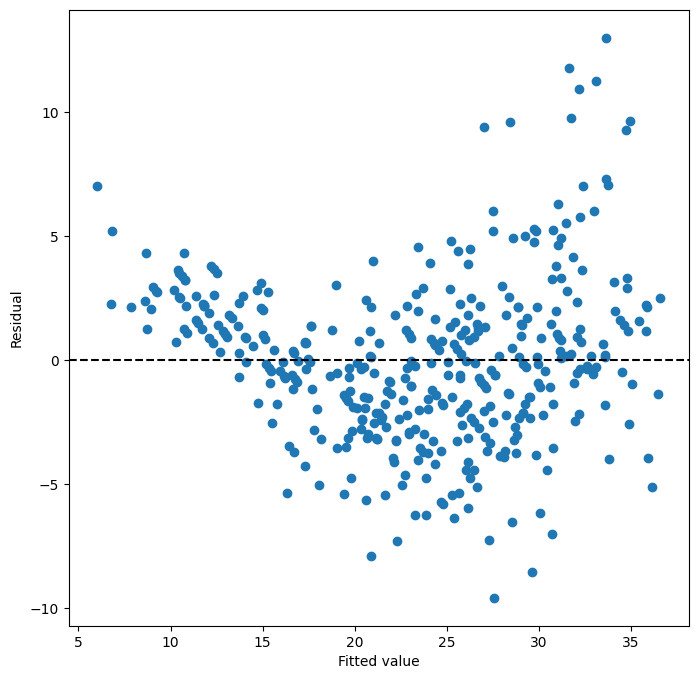

In [45]:
# Checking residual plot to assess linearity of the data
ax = subplots(figsize = (8,8))[1]
ax.scatter(auto_multi_result.fittedvalues, auto_multi_result.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c= 'k', ls = '--')

There's an "U" shape. This indicates a lack of linearity in the data

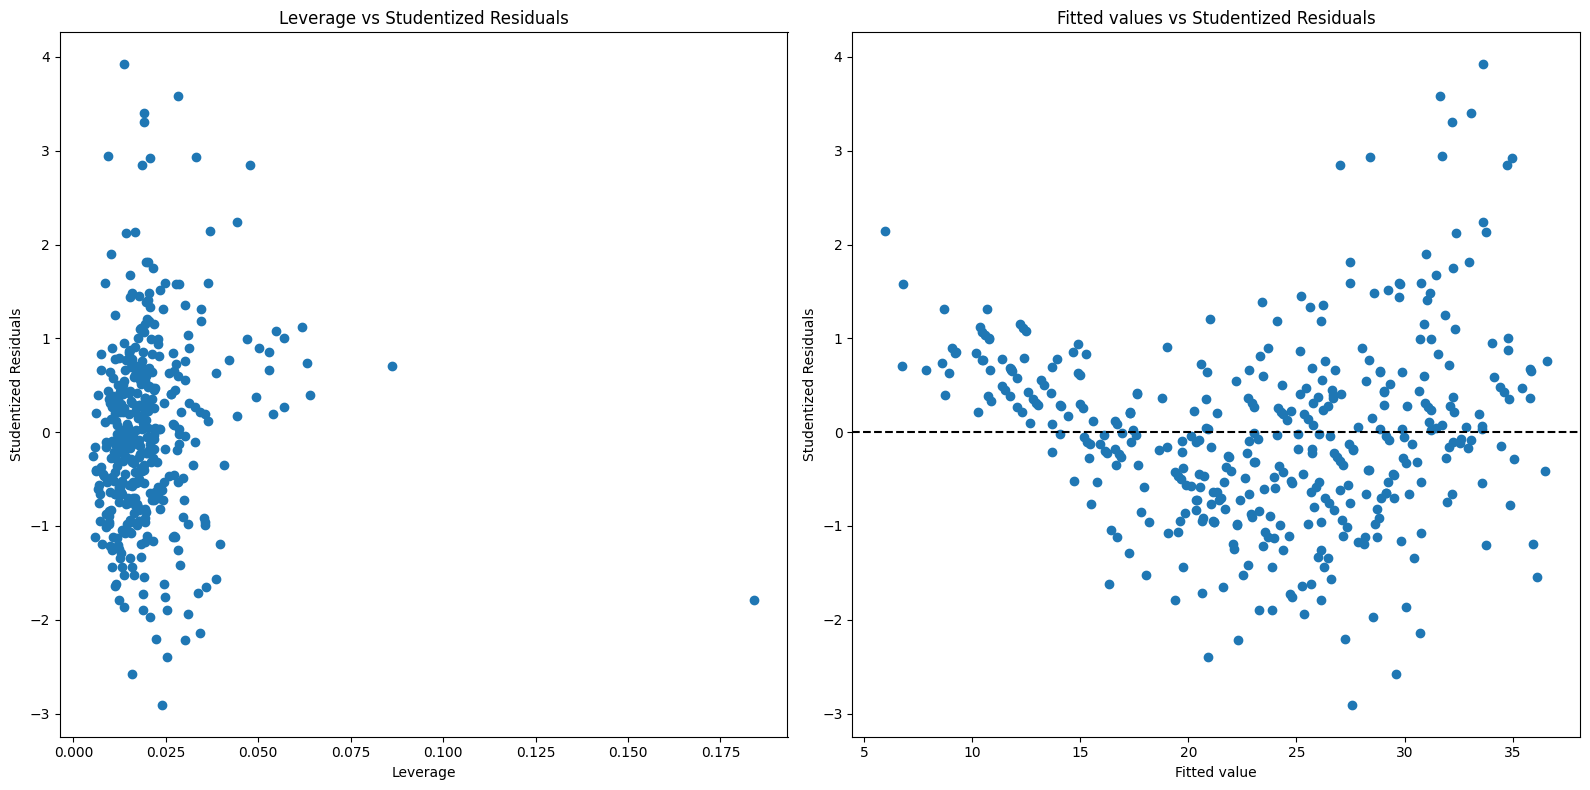

In [46]:
# Get studentized residuals and influence
stu_res = auto_multi_result.get_influence().get_resid_studentized_external()
infl = auto_multi_result.get_influence()

# Create subplots for leverage vs studentized residuals and fitted values vs studentized residuals
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Leverage vs Studentized Residuals
ax[0].scatter(infl.hat_matrix_diag, stu_res)
ax[0].set_xlabel('Leverage')
ax[0].set_ylabel('Studentized Residuals')
ax[0].set_title('Leverage vs Studentized Residuals')

# Fitted values vs Studentized Residuals
ax[1].scatter(auto_multi_result.fittedvalues, stu_res)
ax[1].set_xlabel('Fitted value')
ax[1].set_ylabel('Studentized Residuals')
ax[1].axhline(0, color='k', linestyle='--')
ax[1].set_title('Fitted values vs Studentized Residuals')

# Show the plots
plt.tight_layout()
plt.show()

It seems like there no high leverage points. However, there are some outliers

In [47]:
r = auto_multi_result.get_influence().resid_studentized_internal
outliers = abs(r) > 3
auto[outliers]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
244,43.1,4,90.0,48.0,1985,21.5,78,2,volkswagen rabbit custom diesel
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc
325,44.3,4,90.0,48.0,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel)


To be sure about high leverage points I'll calculate the mean of leverage and I'll consider as high leverage points those which are above 3 times the mean.

Average Leverage: 0.02015113350125938
High Leverage Threshold: 0.060453400503778135
Indices of High Leverage Points: [ 8 13 26 27 28]


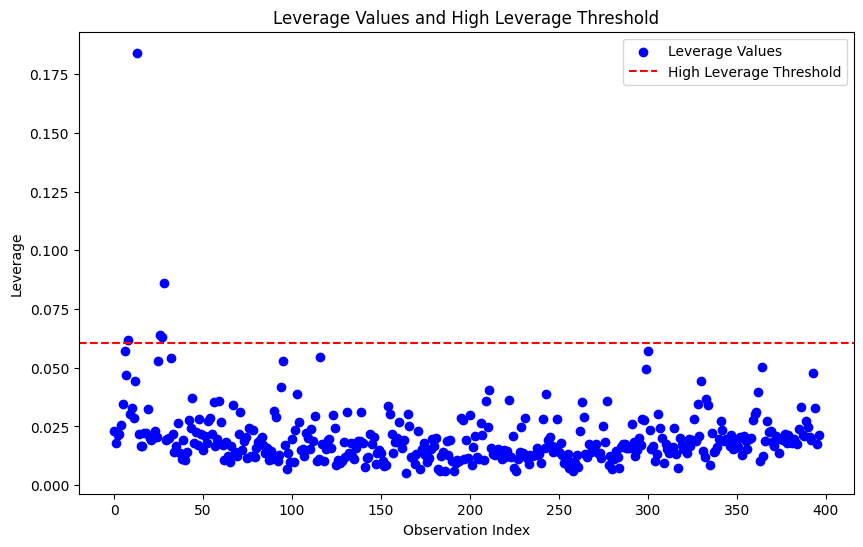

In [50]:
leverage = infl.hat_matrix_diag
average_leverage = np.average(leverage) # Above this they may be considered high leverage points
high_leverage_threshold = average_leverage * 3

high_leverage_points = np.where(leverage > high_leverage_threshold)[0]

print("Average Leverage:", average_leverage)
print("High Leverage Threshold:", high_leverage_threshold)
print("Indices of High Leverage Points:", high_leverage_points)

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(leverage)), leverage, color='blue', label='Leverage Values')
plt.axhline(y=high_leverage_threshold, color='red', linestyle='--', label='High Leverage Threshold')
plt.title("Leverage Values and High Leverage Threshold")
plt.xlabel("Observation Index")
plt.ylabel("Leverage")
plt.legend()
plt.show()

### Contesting the additive assumption

In [51]:
auto['horsepower', 'weight'] = auto['horsepower'] * auto['weight']
auto['horsepower', 'acceleration'] = auto['horsepower'] * auto['acceleration']
auto['acceleration', 'weight'] = auto['acceleration'] * auto['weight']

var = auto.columns.drop(['mpg', 'name']).to_list()
auto[var]

,cylinders,displacement,horsepower,weight,acceleration,year,origin,"(horsepower, weight)","(horsepower, acceleration)","(acceleration, weight)"
0,8,307.0,130.0,3504,12.0,70,1,455520.0,1560.0,42048.0
1,8,350.0,165.0,3693,11.5,70,1,609345.0,1897.5,42469.5
2,8,318.0,150.0,3436,11.0,70,1,515400.0,1650.0,37796.0
3,8,304.0,150.0,3433,12.0,70,1,514950.0,1800.0,41196.0
4,8,302.0,140.0,3449,10.5,70,1,482860.0,1470.0,36214.5
...,...,...,...,...,...,...,...,...,...,...
392,4,140.0,86.0,2790,15.6,82,1,239940.0,1341.6,43524.0
393,4,97.0,52.0,2130,24.6,82,2,110760.0,1279.2,52398.0
394,4,135.0,84.0,2295,11.6,82,1,192780.0,974.4,26622.0
395,4,120.0,79.0,2625,18.6,82,1,207375.0,1469.4,48825.0


In [52]:
X = auto[var]
X = sm.add_constant(X)
y = auto['mpg']

model_auto_NA = sm.OLS(y, X)
result_auto_NA = model_auto_NA.fit()
result_auto_NA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     241.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.49e-159
Time:                        21:44:29   Log-Likelihood:                -986.18
No. Observations:                 397   AIC:                             1994.
Df Residuals:                     386   BIC:                             2038.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.4726      7.530     -0.727      0.468     -20.277       9.332
cylinders                          0.2519      0.299      0.842      0.400      -0.336       0.840
displacement                      -0.0062      0.008     -0.810      0.419      -0.021       0.009
horsepower                        -0.1131      0.040     -2.829      0.005      -0.192      -0.034
weight                            -0.0115      0.003     -4.530      0.000      -0.016      -0.006
acceleration                       0.2229      0.294      0.759      0.449      -0.355       0.801
year                               0.7804      0.045     17.358      0.000       0.692       0.869
origin                             0.6749      0.253      2.669      0.008       0.178       1.172
('horsepower', 'weight')        4.871e-05   6.63e-06      7.342      0.000    3.57e-05    6.18e-05
('horsepower', 'acceleration')    -0.0063      0.002     -2.715      0.007      -0.011      -0.002
('acceleration', 'weight')      9.256e-05      0.000      0.710      0.478      -0.000       0.000
==============================================================================
Omnibus:                       34.378   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.480
Skew:                           0.528   Prob(JB):                     2.71e-14
Kurtosis:                       4.631   Cond. No.                     2.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the new p-values are significant, then they should be integrated into the model along with their original source

### Contesting the linearity assumption

In [53]:
auto['horsepower squared'] = auto['horsepower'] ** 2
auto['horsepower sqrt'] = auto['horsepower'] ** 0.5
auto['acceleration log'] = np.log(auto['acceleration'])

var2 = auto.columns.drop(['mpg', 'name']).to_list()
auto[var2]

,cylinders,displacement,horsepower,weight,acceleration,year,origin,"(horsepower, weight)","(horsepower, acceleration)","(acceleration, weight)",horsepower squared,horsepower sqrt,acceleration log
0,8,307.0,130.0,3504,12.0,70,1,455520.0,1560.0,42048.0,16900.0,11.401754,2.484907
1,8,350.0,165.0,3693,11.5,70,1,609345.0,1897.5,42469.5,27225.0,12.845233,2.442347
2,8,318.0,150.0,3436,11.0,70,1,515400.0,1650.0,37796.0,22500.0,12.247449,2.397895
3,8,304.0,150.0,3433,12.0,70,1,514950.0,1800.0,41196.0,22500.0,12.247449,2.484907
4,8,302.0,140.0,3449,10.5,70,1,482860.0,1470.0,36214.5,19600.0,11.832160,2.351375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,4,140.0,86.0,2790,15.6,82,1,239940.0,1341.6,43524.0,7396.0,9.273618,2.747271
393,4,97.0,52.0,2130,24.6,82,2,110760.0,1279.2,52398.0,2704.0,7.211103,3.202746
394,4,135.0,84.0,2295,11.6,82,1,192780.0,974.4,26622.0,7056.0,9.165151,2.451005
395,4,120.0,79.0,2625,18.6,82,1,207375.0,1469.4,48825.0,6241.0,8.888194,2.923162


In [54]:
X = auto[var2]
X = sm.add_constant(X)
y = auto['mpg']

model_auto_NL = sm.OLS(y, X)
result_auto_NL = model_auto_NL.fit()
result_auto_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.03e-156
Time:                        21:44:45   Log-Likelihood:                -983.96
No. Observations:                 397   AIC:                             1996.
Df Residuals:                     383   BIC:                             2052.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             35.1563     37.798      0.930      0.353     -39.161     109.474
cylinders                          0.1346      0.341      0.395      0.693      -0.535       0.804
displacement                      -0.0031      0.008     -0.394      0.694      -0.019       0.012
horsepower                        -0.0920      0.409     -0.225      0.822      -0.897       0.713
weight                            -0.0136      0.006     -2.457      0.014      -0.024      -0.003
acceleration                       1.1763      0.872      1.350      0.178      -0.537       2.890
year                               0.7886      0.045     17.478      0.000       0.700       0.877
origin                             0.6820      0.261      2.618      0.009       0.170       1.194
('horsepower', 'weight')          6.1e-05   1.77e-05      3.443      0.001    2.62e-05    9.58e-05
('horsepower', 'acceleration')    -0.0040      0.007     -0.581      0.562      -0.018       0.010
('acceleration', 'weight')         0.0001      0.000      0.519      0.604      -0.000       0.001
horsepower squared                -0.0003      0.001     -0.513      0.608      -0.001       0.001
horsepower sqrt                   -0.4821      5.793     -0.083      0.934     -11.872      10.908
acceleration log                 -19.2582     15.266     -1.262      0.208     -49.273      10.757
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.900
Skew:                           0.503   Prob(JB):                     8.08e-15
Kurtosis:                       4.706   Cond. No.                     1.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The log of acceleration is significant, so it should be included in to the model